# Segunda Entrega

## Representação da solução

Como a base está representada através de pontos que são os vértices e as arestas são as distâncias euclideanas para todos os pontos.
Resumindo, todos os pontos estão "conectados" por uma aresta de peso igual a distância euclideana entre eles.

### Heuristicas Construtivas do PCV
* Heuristica do vizinho mais próximo
* Heuristica da inserção do mais próximo
* Heuristica da inserção do mais distante

In [1]:
#%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt

import os
import numpy as np
from math import sqrt

In [2]:
nome_de_instancias = os.listdir("./dataset/")[:-1]

In [3]:
file_name = "./dataset/" + nome_de_instancias[12]
with open(file_name, "r") as f:
    text = f.read().split("\n")[6:-1]

In [4]:
text[0], len(text)

('1 909444 143969', 1000)

In [5]:
coordenadas = []
for vertice in text:
    coordenadas.append(vertice.split(" "))

In [6]:
coordenadas[0], len(text)

(['1', '909444', '143969'], 1000)

In [7]:
coordenadas_np = np.array(coordenadas).astype("int")

In [8]:
coordenadas_np[0], coordenadas_np.shape

(array([     1, 909444, 143969]), (1000, 3))

In [9]:
pontos = []
for no_x_y in coordenadas_np:
    pontos.append([no_x_y[1], no_x_y[2]])
pontos[0:5], len(pontos)

([[909444, 143969],
  [515900, 293384],
  [749939, 228922],
  [404862, 491857],
  [286983, 437810]],
 1000)

In [10]:
tamanho = 100
pontos = pontos[0:tamanho]
pontos[0:5], len(pontos)

([[909444, 143969],
  [515900, 293384],
  [749939, 228922],
  [404862, 491857],
  [286983, 437810]],
 100)

# Arquivos com as instâncias aberto, agora criar  as funções

# Cálculo das distâncias

In [11]:
def dist(a, b):
    return sqrt(pow(a[0] - b[0], 2) + pow(a[1] - b[1], 2))

def distancia_percurso(points):
    # Caso em que a lista é zero
    if len(points) == 0:
        return 0
    
    # Iniciando a distância com zero
    distancia_percurso = 0
    
    # Soma todos os pontos
    for i in range(len(points) - 1):
        distancia_percurso += dist(points[i], points[i + 1])
    
    # Soma a distância do último ponto com o primeiro
    distancia_percurso += dist(points[len(points)-1], points[0])
    return distancia_percurso

# Heuristica de Construção

In [12]:
def vizinhos_mais_proximos(array_points):
    
    points = list(array_points)
    
    if len(points) == 0:
        return []
    
    # Escolhe o vértice inicial
    current = points[0]
    # Armazena em um array, que terá o caminho criado pelo nnpoints
    nnpoints = [current]
    # Remove do conjuto total
    points.remove(current)
    # Repete até que o conjunto inicial acabe
    while len(points) > 0:
        next = points[0]
        # Escolhe um vértice u mais próximo de um dos extremos de C
        for point in points:
            if dist(current, point) < dist(current, next):
                next = point
        # Acrescenta o vértice no array
        nnpoints.append(next)
        # Remove do conjunto
        points.remove(next)
        # considera que o novo nó a ser utilizado será o do final
        current = next
        # Numeros faltantes de pontos
        print("Len points", len(points), end="\r")
    return nnpoints, distancia_percurso(nnpoints)

# Movimento de Vizinhança

## 2-OPT

In [13]:
def two_opt(array_points):
    points = list(array_points)
    
    melhor_ate_agora = list(points)
    print("Dist inicial:", distancia_percurso(melhor_ate_agora))
    
    for i in range(len(points) - 1):
        for j in range(i + 2, len(points) - 1):
            # Verifica se a troca de 2 arestas é vantajosa, se sim, troque pela menor
            if dist(points[i], points[i+1]) + dist(points[j], points[j+1]) > dist(points[i], points[j]) + dist(points[i+1], points[j+1]):          
                #print("vai dar swap")
                # SWAP 
                points[i+1:j+1] = reversed(points[i+1:j+1])
                #print(points[i+1:j+1], reversed(points[i+1:j+1]))
                if distancia_percurso(points) < distancia_percurso(melhor_ate_agora):
                    #print("pegou um")
                    melhor_ate_agora = points
                    continue
                else:
                    # RESWAP pois não é o melhor até agora
                    points[i+1:j+1] = reversed(points[i+1:j+1])

                    
    return melhor_ate_agora, distancia_percurso(melhor_ate_agora)

# Insertion

Escolhe um vértice, testa todas as posições em um array e retorna o primeiro array que foi melhor que o original.

First Improvement

In [14]:
def insertion(array_lista):
    if len(array_lista) < 0:
        raise ValueError("Lista vazia")
        
    lista = list(array_lista)
    melhor_ate_agora = distancia_percurso(lista)
    print("Distancia Da entrada: ", melhor_ate_agora)
    
    for i in range(len(lista)):
        #print("\n\ni == ", i)
        #print(lista)
        a = lista.pop(i)
        #print(a, "cut", lista)
        #print("Começando o 2º for")        
        for j in range(len(lista)+1):
            lista.insert(j, a)
            nova_distancia = distancia_percurso(lista)
            #print("#"*3, lista,"SUM =>", nova_distancia)
            #print("len", len(lista))
            if nova_distancia < melhor_ate_agora:
                melhor_ate_agora = nova_distancia
                #print(melhor_ate_agora)
                
                #Comente essa linha se deseja Best Improvement
                return lista, melhor_ate_agora
            else:
                # Removendo, já que não possui distância menor
                #pass
                lista.pop(j)
        lista.insert(i,a)
    return lista, melhor_ate_agora

# Processo de Criação

In [15]:
vmp_array, vmp_dist = vizinhos_mais_proximos(pontos)
print("Custo:", vmp_dist)

Custo: 5337905.746478797


Array criado, nome de `vmp_array`, e custo de `vmp_dist`

## Benckmark com o Insertion

In [16]:
%time insertion_array , insertion_dist = insertion(vmp_array)
insertion_dist

Distancia Da entrada:  5337905.746478797
CPU times: user 41.8 ms, sys: 838 µs, total: 42.6 ms
Wall time: 40.7 ms


5332199.688797566

## Benckmark com o 2-OPT

In [17]:
%time two_opt_array, two_opt_dist = two_opt(vmp_array)
two_opt_dist

Dist inicial: 5337905.746478797
CPU times: user 110 ms, sys: 1.01 ms, total: 111 ms
Wall time: 108 ms


5301072.002634718

# VND (Variable Neighbourhood Descent)

In [18]:
def VND(array_lista, n_iteracoes):
    lista = list(array_lista)
    
    
    melhor_ate_agora = distancia_percurso(lista)
    print("Inicial:", melhor_ate_agora)
    while n_iteracoes >= 0:
        print("\n##", n_iteracoes ,"##\n")
        
        # Rodar insertion, caso for bom, rodo de novo
        insertion_array, insertion_dist= insertion(lista)
        
        print("Insertion:", insertion_dist, len(insertion_array))
        # Caso o Insertion for bom, volte pro Insertion
        if insertion_dist < melhor_ate_agora:
            melhor_ate_agora = insertion_dist
            lista = insertion_array
            n_iteracoes = n_iteracoes - 1
            continue
        
        
        # Se Insertion for ruim, rode o 2-OPT 
        lista_two_opt, two_opt_dist = two_opt(lista)
        print("2-OPT: ", two_opt_dist, len(two_opt_array))
        if two_opt_dist < melhor_ate_agora:
            melhor_ate_agora = two_opt_dist
            lista = lista_two_opt
            n_iteracoes = n_iteracoes - 1
            continue
        
        # Caso o Insertion e o 2-OPT for ruim, pare
        print("Insertion e 2-OPT sem sucesso")
        break
    return lista

In [19]:
resultado_vnd = VND(vmp_array, n_iteracoes=100)

Inicial: 5337905.746478797

## 100 ##

Distancia Da entrada:  5337905.746478797
Insertion: 5332199.688797566 100

## 99 ##

Distancia Da entrada:  5332199.688797566
Insertion: 5332199.688797565 100

## 98 ##

Distancia Da entrada:  5332199.688797565
Insertion: 5328827.586140712 100

## 97 ##

Distancia Da entrada:  5328827.586140712
Insertion: 5325001.389797148 100

## 96 ##

Distancia Da entrada:  5325001.389797148
Insertion: 5321639.922121451 100

## 95 ##

Distancia Da entrada:  5321639.922121451
Insertion: 5286545.555487686 100

## 94 ##

Distancia Da entrada:  5286545.555487686
Insertion: 5195060.307651321 100

## 93 ##

Distancia Da entrada:  5195060.307651321
Insertion: 5189226.260056689 100

## 92 ##

Distancia Da entrada:  5189226.260056689
Insertion: 5189167.941860838 100

## 91 ##

Distancia Da entrada:  5189167.941860838
Insertion: 5182816.187139595 100

## 90 ##

Distancia Da entrada:  5182816.187139595
Insertion: 5182387.022239928 100

## 89 ##

Distancia Da entrada:  518

# Gráficos

## Construção original

In [20]:
vmp_array_x = []
vmp_array_y = []
for i in vmp_array:
    vmp_array_x.append(i[0])
    vmp_array_y.append(i[1])

## Resultado do VND

In [21]:
resultado_vnd_x = []
resultado_vnd_y = []
for i in resultado_vnd:
    resultado_vnd_x.append(i[0])
    resultado_vnd_y.append(i[1])

<IPython.core.display.Javascript object>


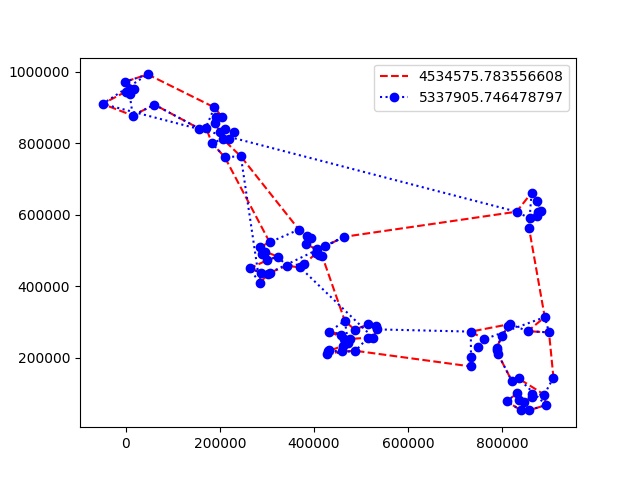

In [23]:
#plt.rcParams['figure.figsize'] = [17, 8]
plt.plot(resultado_vnd_x,resultado_vnd_y ,'r--', label=str(distancia_percurso(resultado_vnd)))
plt.plot(vmp_array_x,vmp_array_y ,'ob:', label=str(vmp_dist))
plt.legend()
plt.show()

# Aplicando GRASP

## construcao_solucao(alfa)

### lista_de_candidatos(LC)

Lista de candidatos criada aleatóriamente

### Lista restrita de candidatos(LRC)

Criada através da restrição setada por alfa [0,1)

O tamanho de LCR é determinado por:

Cardinalidade LCR = $\alpha$ * Cardinalidade LC



In [24]:
def GRASP(N_iteracoes_GRASP, N_iteracoes_VND, alfa):
    for i in range(N_iteracoes):
        # Constroi um caminho com base na aleatoriedade
        solucao = construcao_solucao(alfa)
        
        # Algorítimo de 'busca_local'
        solucao = VND(solucao, N_iteracoes_VND)

        # Memoriza melhor solucao
        melhores_solucoes = []
        melhores_solucoes.append(solucao)
    return melhores_solucoes

In [70]:
import random
#def construcao_solucao(alfa):
pontos = [[12-i, i] for i in range(12)]
alfa = 0.1
random.seed(42)

caminho = list(pontos)    
if len(caminho) == 0:
    raise ValueError()

# Escolhe o vértice inicial
current = caminho[0]
# Armazena em um array, que terá o caminho criado pelo nnpoints
solucao = [current]

# Remove do conjuto total
caminho.remove(current)

# Repete até que o conjunto inicial acabe
while len(caminho) > 0:
    
    # Escolhe um nó para ser analisado
    next = caminho[0]
    
    print("\n\n", len(caminho), next, "\n\n")
    
    
    # Escolhe um vértice u mais próximo de um dos extremos de C
    for vertice in caminho:
        # Cria uma cópia do caminho, ou seja todos os vértices que ainda não foram visitados
        lista_candidatos = list(caminho)
        # Lista que armazenará os candidatos em ordem crescente de distancia do vertice
        lista_candidatos_restrita = []
        
        # Ite
        for candidato in lista_candidatos:
            distancia_candidato_vertice = dist(vertice, candidato)
            print("vert" , vertice, "->", "C", candidato, distancia_candidato_vertice)
            lista_candidatos_restrita.append([*candidato, distancia_candidato_vertice])    
        lista_candidatos_restrita.sort(key=lambda x: x[2])
        
        print(lista_candidatos_restrita)
        print(lista_candidatos_restrita[1:])
        
        # Transformando pra numpy array para remover a coluna de distâncias
        #lista_candidatos_restrita_np = np.array(lista_candidatos_restrita[1:])
        # Coluna removida e passada pra lista de novo
        lista_candidatos_restrita_np = np.delete(lista_candidatos_restrita[1:], 2, 1)
        lista_candidatos_restrita = list(lista_candidatos_restrita_np)
        print(type(lista_candidatos_restrita))
        
        indice_valor = random.randrange(0, int(alfa*len(lista_candidatos_restrita)+1))
        next = list(lista_candidatos_restrita[indice_valor].astype(int))
        
        '''
        if dist(current, vertice) < dist(current, next):
            next = vertice
        '''
    
    # Acrescenta o vértice no array
    solucao.append(next)
    print("solucao: ", solucao)
    
    
    # Remove do conjunto
    print("\n n, t:", next, type(next), caminho)
    caminho.remove(next)
    
    # considera que o novo nó a ser utilizado será o do final
    current = next
    
    # Numeros faltantes de pontos
    print("Len caminho", len(caminho), end="\r")
solucao, distancia_percurso(solucao)



 11 [11, 1] 


vert [11, 1] -> C [11, 1] 0.0
vert [11, 1] -> C [10, 2] 1.4142135623730951
vert [11, 1] -> C [9, 3] 2.8284271247461903
vert [11, 1] -> C [8, 4] 4.242640687119285
vert [11, 1] -> C [7, 5] 5.656854249492381
vert [11, 1] -> C [6, 6] 7.0710678118654755
vert [11, 1] -> C [5, 7] 8.48528137423857
vert [11, 1] -> C [4, 8] 9.899494936611665
vert [11, 1] -> C [3, 9] 11.313708498984761
vert [11, 1] -> C [2, 10] 12.727922061357855
vert [11, 1] -> C [1, 11] 14.142135623730951
[[11, 1, 0.0], [10, 2, 1.4142135623730951], [9, 3, 2.8284271247461903], [8, 4, 4.242640687119285], [7, 5, 5.656854249492381], [6, 6, 7.0710678118654755], [5, 7, 8.48528137423857], [4, 8, 9.899494936611665], [3, 9, 11.313708498984761], [2, 10, 12.727922061357855], [1, 11, 14.142135623730951]]
[[10, 2, 1.4142135623730951], [9, 3, 2.8284271247461903], [8, 4, 4.242640687119285], [7, 5, 5.656854249492381], [6, 6, 7.0710678118654755], [5, 7, 8.48528137423857], [4, 8, 9.899494936611665], [3, 9, 11.313708498984761], [

vert [11, 1] -> C [9, 3] 2.8284271247461903
vert [11, 1] -> C [1, 11] 14.142135623730951
[[11, 1, 0.0], [10, 2, 1.4142135623730951], [9, 3, 2.8284271247461903], [1, 11, 14.142135623730951]]
[[10, 2, 1.4142135623730951], [9, 3, 2.8284271247461903], [1, 11, 14.142135623730951]]
<class 'list'>
vert [10, 2] -> C [11, 1] 1.4142135623730951
vert [10, 2] -> C [10, 2] 0.0
vert [10, 2] -> C [9, 3] 1.4142135623730951
vert [10, 2] -> C [1, 11] 12.727922061357855
[[10, 2, 0.0], [11, 1, 1.4142135623730951], [9, 3, 1.4142135623730951], [1, 11, 12.727922061357855]]
[[11, 1, 1.4142135623730951], [9, 3, 1.4142135623730951], [1, 11, 12.727922061357855]]
<class 'list'>
vert [9, 3] -> C [11, 1] 2.8284271247461903
vert [9, 3] -> C [10, 2] 1.4142135623730951
vert [9, 3] -> C [9, 3] 0.0
vert [9, 3] -> C [1, 11] 11.313708498984761
[[9, 3, 0.0], [10, 2, 1.4142135623730951], [11, 1, 2.8284271247461903], [1, 11, 11.313708498984761]]
[[10, 2, 1.4142135623730951], [11, 1, 2.8284271247461903], [1, 11, 11.3137084989

AxisError: axis 1 is out of bounds for array of dimension 1

In [84]:
import random
#def construcao_solucao(alfa):
pontos = [[12-i, i] for i in range(12)]
alfa = 0.1
random.seed(42)

caminho = list(pontos)    
if len(caminho) == 0:
    raise ValueError()

# Escolhe o vértice inicial
current = caminho[0]
# Armazena em um array, que terá o caminho criado pelo nnpoints
solucao = [current]

# Remove do conjuto total
caminho.remove(current)

# Repete até que o conjunto inicial acabe
while len(caminho) > 0:
    
    # Escolhe um nó para ser analisado
    vertice = caminho[0]
    
    print("\n\n", len(caminho), vertice, "\n\n")
    
    
    
    # Criar lista de candidatos, com base nos outros que não foram visitados
    try:
        lista_candidatos = list(caminho[1:])
    except:
        # Acrescenta o vértice no array
        solucao.append(vertice)
        print("solucao: ", solucao)
        # Remove do conjunto
        #print("\n n, t:", next, type(next), caminho)
        caminho.remove(vertice)
        break
    
    # Lista que armazenará os candidatos em ordem crescente de distancia do vertice
    lista_candidatos_restrita = []
    
    #################################################################################    
    # Criar lista de candidatos ordenada
    
    # Para cada candidato na lista_candidatos:
    for candidato in lista_candidatos:
        
        # Calcule a distancia do nó atual aos outros
        distancia_candidato_vertice = dist(vertice, candidato)
        
        print("vert" , vertice, "->", "C", candidato, distancia_candidato_vertice)
        
        # Adicione na lista_candidatos_restrita a lista [x, y, distancia_candidato_vertice]
        lista_candidatos_restrita.append([*candidato, distancia_candidato_vertice])    
    
    # Após todos os valores adicionados, ordene pela coluna das distancias
    lista_candidatos_restrita.sort(key=lambda x: x[2])
    
    ###################################################################################
    
    print("Lista de candidatos restrita:\n", lista_candidatos_restrita, "\n")
    
    # Coluna removida e passada pra lista de novo
    lista_candidatos_restrita_np = np.delete(lista_candidatos_restrita, 2, 1)
    
    # De volta para lista, agora ordenada sem a coluna de distância
    lista_candidatos_restrita = list(lista_candidatos_restrita_np)
    print(type(lista_candidatos_restrita))
    
    # Escolher um candidato usando a função aleatória
    
    indice_valor = random.randrange(0, int(alfa*len(lista_candidatos_restrita)+1))
    
    vertice = list(lista_candidatos_restrita[indice_valor].astype(int))
    
    # Acrescenta o vértice no array
    solucao.append(vertice)
    print("solucao: ", solucao)
    
    
    # Remove do conjunto
    #print("\n n, t:", next, type(next), caminho)
    caminho.remove(vertice)
    
    # considera que o novo nó a ser utilizado será o do final
    current = vertice
    
    # Numeros faltantes de pontos
    #print("Len caminho", len(caminho), end="\r")
solucao, distancia_percurso(solucao)



 11 [11, 1] 


vert [11, 1] -> C [10, 2] 1.4142135623730951
vert [11, 1] -> C [9, 3] 2.8284271247461903
vert [11, 1] -> C [8, 4] 4.242640687119285
vert [11, 1] -> C [7, 5] 5.656854249492381
vert [11, 1] -> C [6, 6] 7.0710678118654755
vert [11, 1] -> C [5, 7] 8.48528137423857
vert [11, 1] -> C [4, 8] 9.899494936611665
vert [11, 1] -> C [3, 9] 11.313708498984761
vert [11, 1] -> C [2, 10] 12.727922061357855
vert [11, 1] -> C [1, 11] 14.142135623730951
Lista de candidatos restrita:
 [[10, 2, 1.4142135623730951], [9, 3, 2.8284271247461903], [8, 4, 4.242640687119285], [7, 5, 5.656854249492381], [6, 6, 7.0710678118654755], [5, 7, 8.48528137423857], [4, 8, 9.899494936611665], [3, 9, 11.313708498984761], [2, 10, 12.727922061357855], [1, 11, 14.142135623730951]] 

<class 'list'>
solucao:  [[12, 0], [10, 2]]


 10 [11, 1] 


vert [11, 1] -> C [9, 3] 2.8284271247461903
vert [11, 1] -> C [8, 4] 4.242640687119285
vert [11, 1] -> C [7, 5] 5.656854249492381
vert [11, 1] -> C [6, 6] 7.071067811865475

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
def VIZINHOS_MAIS_PROXIMOS(array_points):
    
    points = list(array_points)
    
    if len(points) == 0:
        return []
    
    # Escolhe o vértice inicial
    current = points[0]
    # Armazena em um array, que terá o caminho criado pelo nnpoints
    nnpoints = [current]
    # Remove do conjuto total
    points.remove(current)
    # Repete até que o conjunto inicial acabe
    while len(points) > 0:
        next = points[0]
        # Escolhe um vértice u mais próximo de um dos extremos de C
        for point in points:
            if dist(current, point) < dist(current, next):
                next = point
        # Acrescenta o vértice no array
        nnpoints.append(next)
        # Remove do conjunto
        points.remove(next)
        # considera que o novo nó a ser utilizado será o do final
        current = next
        # Numeros faltantes de pontos
        print("Len points", len(points), end="\r")
    return nnpoints, distancia_percurso(nnpoints)

In [ ]:
construcao_solucao(1)